<a href="https://colab.research.google.com/github/Suruchi264/NLP-DL-ML/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A price index** (plural: "price indices" or "price indexes") is a normalized average (typically a weighted average) of price relatives for a given class of goods or services in a specific region over a defined time period. It is a statistic designed to measure how these price relatives, as a whole, differ between time periods or geographical locations, often expressed relative to a base period set at 100.

In [1]:
## in the dataset ==> 2 independent features and 1 dependent feature

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_index = pd.read_csv('/content/sample_data/economic_index.csv')

In [3]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
## drop uneccessary column
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)
## inplace = drop and update it in df

In [8]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
## check null values
df_index.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


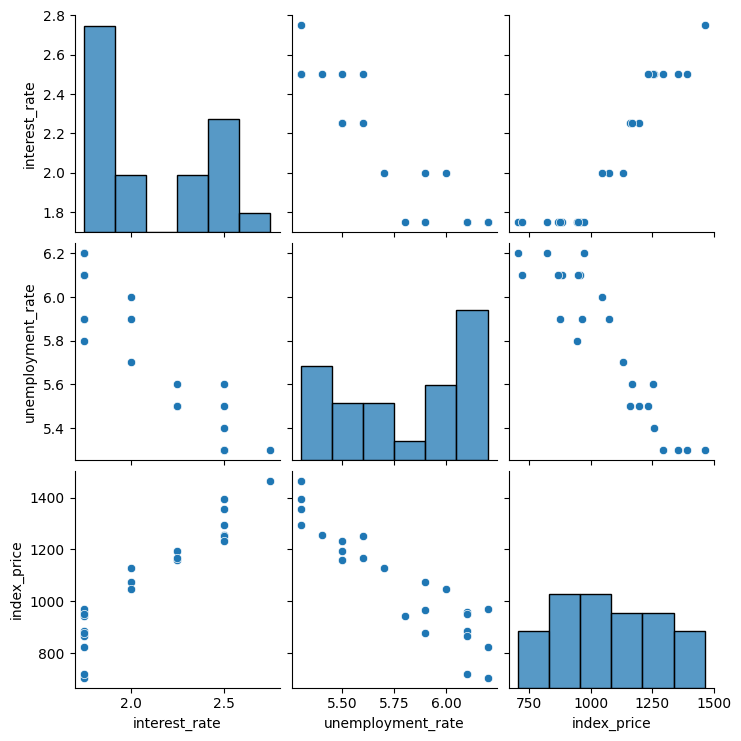

In [11]:
## visualizations
import seaborn as sns
sns.pairplot(df_index)

In [12]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

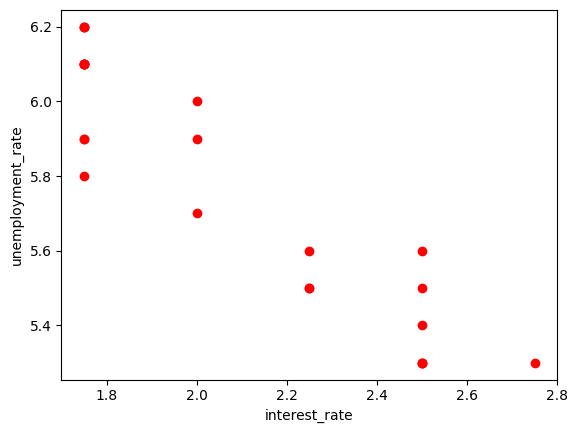

In [14]:
## visualize the data points more closely
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='red')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [16]:
## independent and dependent features
# X = df_index[['interest_rate','unemployment_rate']]

## OR

X = df_index.iloc[:,:-1]
Y = df_index.iloc[:,-1]

In [17]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [18]:
Y

,index_price
0,1464
1,1394
2,1357
3,1293
4,1256
5,1254
6,1234
7,1195
8,1159
9,1167


In [19]:
## Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [20]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

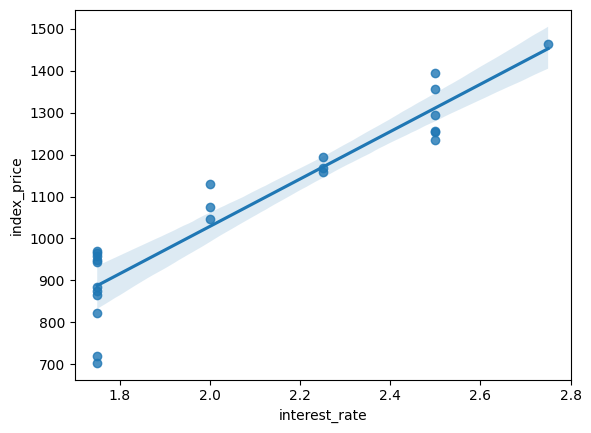

In [23]:
sns.regplot(x='interest_rate', y='index_price', data=df_index)

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

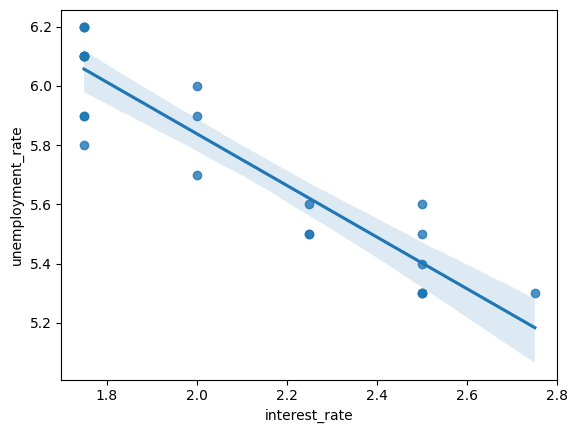

In [24]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

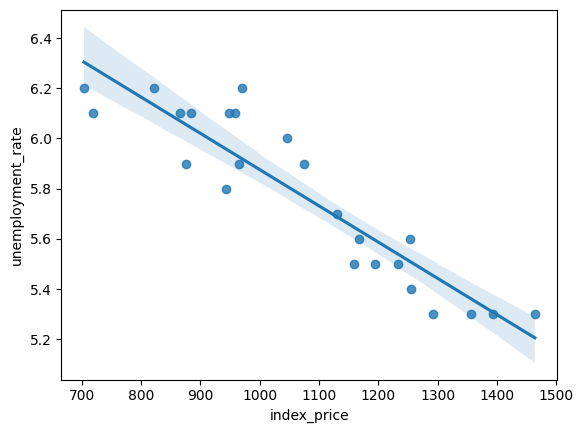

In [25]:
sns.regplot(x='index_price', y='unemployment_rate', data=df_index)

In [26]:
## std scaling
from sklearn.preprocessing import StandardScaler


In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [29]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [30]:
regression.fit(X_train,Y_train)

LinearRegression()

**Cross-validation** is used to evaluate the model's performance using negative mean squared error as the scoring metric.

In [50]:
## Cross Validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,Y_train,scoring='neg_mean_squared_error',cv=3)

In [33]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [34]:
## prediction
Y_pred = regression.predict(X_test)

In [35]:
Y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [36]:
## performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test,Y_pred)
print(r2)

## adjusted r squared
print(1 - (1-r2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


***Assumptions***


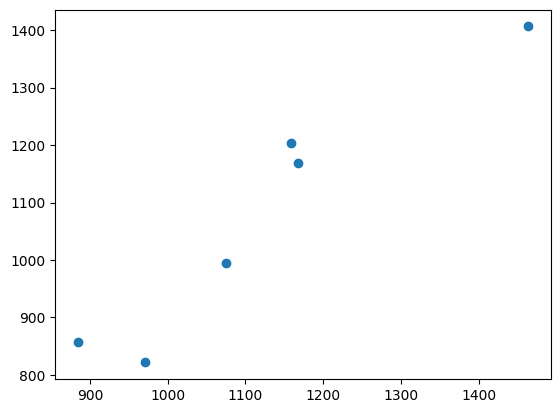

In [42]:
plt.scatter(Y_test,Y_pred)

In [43]:
## error
residuals = Y_test - Y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


<Axes: xlabel='index_price', ylabel='Density'>

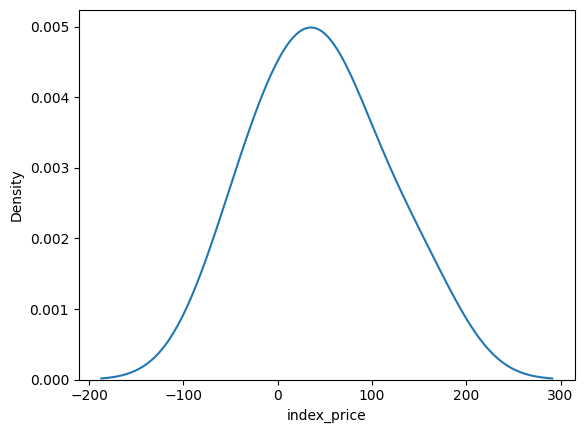

In [45]:
## plot these residuals
sns.kdeplot(residuals)

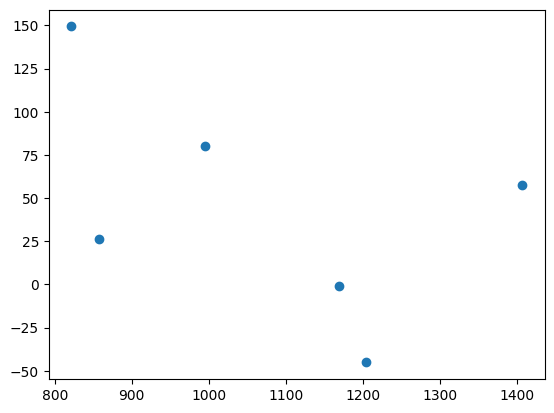

In [46]:
## scatter plot w.r.t prediction and residuals
plt.scatter(Y_pred,residuals)
## data is distributed because it does not follows any pattern

In [48]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(Y_train,X_train).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 26 Jul 2025   Prob (F-statistic):                       0.754
Time:                        10:25:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
print(regression.coef_)

[  88.27275507 -116.25716066]
